# Malnutrition EDA

Malnutrition is a condition that results from eating a diet in which one or more nutrients are either not enough or are too much such that the diet causes health problems.

- Wasting : Also known as 'acute malnutrition', wasting is characterised by a rapid deterioration in nutritional status over a short period of time in children under five years of age. Wasted children are at higher risk of dying.
- Stunting is the impaired growth and development that children experience from poor nutrition, repeated infection, and inadequate psychosocial stimulation. Children are defined as stunted if their height-for-age is more than two standard deviations below the WHO Child Growth Standards median.

The data available

* Severe Wasting - % of children aged 0–59 months who are below minus three standard deviations from median weight-for-height. 
* Wasting – Moderate and severe: % of children aged 0–59 months who are below minus two standard deviations from median weight-for-height
* Overweight – Moderate and severe: % aged 0-59 months who are above two standard deviations from median weight-for-height
* Stunting – Moderate and severe: % of children aged 0–59 months who are below minus two standard deviations from median height-for-age
* Underweight – Moderate and severe: % of children aged 0–59 months who are below minus two standard deviations from median weight-for-age
* Income Classification - When it comes to income , the World Bank divides the world's economies into four income groups: high, upper-middle, lower-middle, and low. The income classification is based on a measure of national income per person, or GNI per capita, calculated using the Atlas method

In [365]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
# figure size in inches
%matplotlib inline

In [366]:
df_country = pd.read_csv("country-wise-average.csv")
df_world = pd.read_csv("malnutrition-estimates.csv")

In [367]:
df_country.head()

,Country,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
0,AFGHANISTAN,0.0,3.033333,10.350000,5.125000,47.775000,30.375000,4918.561500
1,ALBANIA,2.0,4.075000,7.760000,20.800000,24.160000,7.700000,232.859800
2,ALGERIA,2.0,2.733333,5.942857,12.833333,19.571429,7.342857,3565.213143
3,ANGOLA,1.0,2.400000,6.933333,2.550000,42.633333,23.600000,3980.054000
4,ARGENTINA,2.0,0.200000,2.150000,11.125000,10.025000,2.600000,3613.651750


In [368]:
df_country.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                152 non-null    object 
 1   Income Classification  152 non-null    float64
 2   Severe Wasting         140 non-null    float64
 3   Wasting                150 non-null    float64
 4   Overweight             149 non-null    float64
 5   Stunting               151 non-null    float64
 6   Underweight            150 non-null    float64
 7   U5 Population ('000s)  152 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.6+ KB


In [369]:
df_world.head()

,Unnamed: 0,ISO code,Country,Survey Year,Year,Income Classification,LDC,LIFD,LLDC or SID2,Survey Sample (N),Severe Wasting,Wasting,Overweight,Stunting,Underweight,Notes,Report Author,Source,Short Source,U5 Population ('000s)
0,0,AFG,AFGHANISTAN,1997,1997,0,1.0,1.0,1.0,"4,846",NaN,18.2,6.5,53.2,44.9,Converted estimates,CIET International,Afghanistan 1997 multiple indicator baseline (...,MICS,3838.877
1,1,AFG,AFGHANISTAN,2004,2004,0,1.0,1.0,1.0,946,3.5,8.6,4.6,59.3,32.9,NaN,"Ministry of Public Health (Afghanistan), UNICE...",Summary report of the national nutrition surve...,NNS,4789.353
2,2,AFG,AFGHANISTAN,2013,2013,0,1.0,1.0,1.0,"44,26,469",4.0,9.5,5.3,40.4,24.6,NaN,"Ministry of Public Health, UNICEF and the Aga ...",Afghanistan National Nutrition Survey 2013.,SMART,5444.573
3,3,AFG,AFGHANISTAN,2018,2018,0,1.0,1.0,1.0,NaN,1.6,5.1,4.1,38.2,19.1,NaN,KIT Royal Tropical Institute,Afghanistan Health Survey 2018,Other,5601.443
4,4,ALB,ALBANIA,1996-98,1997,2,0.0,0.0,0.0,"7,642",NaN,8.1,9.5,20.4,7.1,Converted estimates,"Institute of Public Health, Food and Nutrition...",National study on nutrition in Albania. Instit...,Other,309.225


In [370]:
df_world.describe()

,Unnamed: 0,Year,Income Classification,LDC,LIFD,LLDC or SID2,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
count,924.000000,924.000000,924.00000,924.000000,924.000000,924.000000,696.000000,877.000000,788.000000,887.000000,902.000000,924.000000
mean,461.500000,2003.730519,1.24026,0.349567,0.424242,0.455628,2.191523,6.955644,6.434772,29.063134,15.841242,6182.704516
std,266.880123,8.792535,0.92202,0.477091,0.494495,0.686648,1.912586,5.039402,4.638849,15.834657,12.509643,16795.938144
min,0.000000,1983.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,230.750000,1996.000000,1.00000,0.000000,0.000000,0.000000,0.800000,2.900000,2.900000,16.650000,4.925000,559.669000
50%,461.500000,2004.500000,1.00000,0.000000,0.000000,0.000000,1.600000,5.900000,5.500000,29.200000,13.400000,1795.523000
75%,692.250000,2011.000000,2.00000,1.000000,1.000000,1.000000,2.900000,9.700000,8.700000,40.200000,23.100000,4194.214000
max,923.000000,2019.000000,3.00000,1.000000,1.000000,2.000000,12.900000,25.300000,30.100000,73.600000,66.800000,132966.782000


In [371]:
df_country.describe()

,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
count,152.000000,140.000000,150.000000,149.000000,151.000000,150.000000,152.000000
mean,1.427632,2.168650,6.599257,7.201638,25.814728,13.503047,4042.927052
std,0.967019,1.708939,4.481723,4.649144,14.686807,10.895839,13164.191927
min,0.000000,0.000000,0.000000,0.962500,1.000000,0.100000,1.000000
25%,1.000000,0.900000,3.262500,3.850000,13.485000,4.305000,241.765813
50%,1.000000,1.872500,5.710714,6.300000,24.160000,10.380000,981.233486
75%,2.000000,2.822727,8.740476,9.080000,36.564935,19.496875,3002.433080
max,3.000000,11.400000,23.650000,26.500000,57.600000,46.266667,123014.491000


In [372]:
df_country.describe(include='object')

,Country
count,152
unique,152
top,EL SALVADOR
freq,1


In [373]:
df_country.isnull().sum()

Country                   0
Income Classification     0
Severe Wasting           12
Wasting                   2
Overweight                3
Stunting                  1
Underweight               2
U5 Population ('000s)     0
dtype: int64

In [374]:
df_country.Country.value_counts().sort_values(ascending=False)

DEMOCRATIC REP. OF THE CONGO (THE)    1
BELIZE                                1
INDIA                                 1
CHILE                                 1
ZIMBABWE                              1
                                     ..
SOLOMON ISLANDS                       1
BURKINA FASO                          1
ARGENTINA                             1
BOLIVIA (PLURINATIONAL STATE OF)      1
EL SALVADOR                           1
Name: Country, Length: 152, dtype: int64

In [375]:
df_mal = df_world.iloc[:,1:]
df_mal.head()

,ISO code,Country,Survey Year,Year,Income Classification,LDC,LIFD,LLDC or SID2,Survey Sample (N),Severe Wasting,Wasting,Overweight,Stunting,Underweight,Notes,Report Author,Source,Short Source,U5 Population ('000s)
0,AFG,AFGHANISTAN,1997,1997,0,1.0,1.0,1.0,"4,846",NaN,18.2,6.5,53.2,44.9,Converted estimates,CIET International,Afghanistan 1997 multiple indicator baseline (...,MICS,3838.877
1,AFG,AFGHANISTAN,2004,2004,0,1.0,1.0,1.0,946,3.5,8.6,4.6,59.3,32.9,NaN,"Ministry of Public Health (Afghanistan), UNICE...",Summary report of the national nutrition surve...,NNS,4789.353
2,AFG,AFGHANISTAN,2013,2013,0,1.0,1.0,1.0,"44,26,469",4.0,9.5,5.3,40.4,24.6,NaN,"Ministry of Public Health, UNICEF and the Aga ...",Afghanistan National Nutrition Survey 2013.,SMART,5444.573
3,AFG,AFGHANISTAN,2018,2018,0,1.0,1.0,1.0,NaN,1.6,5.1,4.1,38.2,19.1,NaN,KIT Royal Tropical Institute,Afghanistan Health Survey 2018,Other,5601.443
4,ALB,ALBANIA,1996-98,1997,2,0.0,0.0,0.0,"7,642",NaN,8.1,9.5,20.4,7.1,Converted estimates,"Institute of Public Health, Food and Nutrition...",National study on nutrition in Albania. Instit...,Other,309.225


In [376]:
df_mal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ISO code               924 non-null    object 
 1   Country                924 non-null    object 
 2   Survey Year            924 non-null    object 
 3   Year                   924 non-null    int64  
 4   Income Classification  924 non-null    int64  
 5   LDC                    924 non-null    float64
 6   LIFD                   924 non-null    float64
 7   LLDC or SID2           924 non-null    float64
 8   Survey Sample (N)      861 non-null    object 
 9   Severe Wasting         696 non-null    float64
 10  Wasting                877 non-null    float64
 11  Overweight             788 non-null    float64
 12  Stunting               887 non-null    float64
 13  Underweight            902 non-null    float64
 14  Notes                  327 non-null    object 
 15  Report

In [377]:
#mean,median,mode functions for EDA
def find_mean(df,x):
    s = 0
    for i in df:
        s+=i
    print("MEAN of %s : %.3f"%(x,(s/len(df))))
    
def find_stdev(df,x):
    s = 0
    for i in df:
        s+=i
    m = s/len(df)
    total = 0
    for i in df:
        total = total+((i-m)**2)
    res = (total/len(df))**(1/2)
    print("STDEV of %s : %.3f"%(x,res))
    
def find_median(df,x):
    df1 = df.sort_values(ascending = True)
    mid = (len(df)+1)//2
    print("MEDIAN of %s : %d"%(x,df1[mid]))

def find_mode(df,x):
    dic = {}
    for i in df:
        if i not in dic:
            dic[i] = 1
        else:
            dic[i] += 1
    res = max(dic.values())
    print("MODE of %s : %d"%(x,res))
    
def find_quart(df,x,pos):
    df1 = df.sort_values(ascending = True)
    qar = pos*((len(df)+1)//4)
    print("QUARTILE of %s : %d"%(x,df1[qar]))

In [378]:
#filling missing values in country averages(df_country)
for i in df_country.columns:
    if type(df_country[i][0]) == np.float64:
        df_country[i]=df_country[i].fillna(df_country[i].mean())

In [379]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                152 non-null    object 
 1   Income Classification  152 non-null    float64
 2   Severe Wasting         152 non-null    float64
 3   Wasting                152 non-null    float64
 4   Overweight             152 non-null    float64
 5   Stunting               152 non-null    float64
 6   Underweight            152 non-null    float64
 7   U5 Population ('000s)  152 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.6+ KB


In [380]:
#filling missing values in malnutrition (df_mal)
df_mal = df_mal.fillna(df_mal.mean())

In [381]:
#finding mean for all possible rows(int and float) on country_average
for i in df_country.columns:
    if type(df_country[i][0]) == np.float64:
        find_mean(df_country[i],i)

MEAN of Income Classification : 1.428
MEAN of Severe Wasting : 2.169
MEAN of Wasting : 6.599
MEAN of Overweight : 7.202
MEAN of Stunting : 25.815
MEAN of Underweight : 13.503
MEAN of U5 Population ('000s) : 4042.927


In [382]:
#finding mean for all possible rows(int and float) in malnutrition
for i in df_mal.columns:
    if (type(df_mal[i][1]) == np.float64) or (type(df_mal[i][1]) == np.int64):
        find_mean(df_mal[i],i)

MEAN of Year : 2003.731
MEAN of Income Classification : 1.240
MEAN of LDC : 0.350
MEAN of LIFD : 0.424
MEAN of LLDC or SID2 : 0.456
MEAN of Severe Wasting : 2.192
MEAN of Wasting : 6.956
MEAN of Overweight : 6.435
MEAN of Stunting : 29.063
MEAN of Underweight : 15.841
MEAN of U5 Population ('000s) : 6182.705


In [383]:
#finding median for all possible rows(int and float) on country_average
for i in df_country.columns:
    if type(df_country[i][0]) == np.float64:
        find_median(df_country[i],i)

MEDIAN of Income Classification : 0
MEDIAN of Severe Wasting : 1
MEDIAN of Wasting : 5
MEDIAN of Overweight : 3
MEDIAN of Stunting : 37
MEDIAN of Underweight : 17
MEDIAN of U5 Population ('000s) : 618


In [384]:
#finding median for all possible rows(int and float) in malnutrition
for i in df_mal.columns:
    if (type(df_mal[i][1]) == np.float64) or (type(df_mal[i][1]) == np.int64):
        find_median(df_mal[i],i)

MEDIAN of Year : 2016
MEDIAN of Income Classification : 0
MEDIAN of LDC : 1
MEDIAN of LIFD : 1
MEDIAN of LLDC or SID2 : 0
MEDIAN of Severe Wasting : 0
MEDIAN of Wasting : 4
MEDIAN of Overweight : 2
MEDIAN of Stunting : 30
MEDIAN of Underweight : 13
MEDIAN of U5 Population ('000s) : 702


In [385]:
#finding mean for all possible rows(int and float) on country_average
for i in df_country.columns:
    if type(df_country[i][0]) == np.float64:
        find_mode(df_country[i],i)

MODE of Income Classification : 54
MODE of Severe Wasting : 12
MODE of Wasting : 3
MODE of Overweight : 3
MODE of Stunting : 2
MODE of Underweight : 2
MODE of U5 Population ('000s) : 3


In [386]:
#finding mode for all possible rows(int and float) in malnutrition
for i in df_mal.columns:
    if (type(df_mal[i][1]) == np.float64) or (type(df_mal[i][1]) == np.int64):
        find_mode(df_mal[i],i)

MODE of Year : 59
MODE of Income Classification : 335
MODE of LDC : 601
MODE of LIFD : 532
MODE of LLDC or SID2 : 606
MODE of Severe Wasting : 228
MODE of Wasting : 47
MODE of Overweight : 136
MODE of Stunting : 37
MODE of Underweight : 22
MODE of U5 Population ('000s) : 3


In [387]:
#finding standard deviation for all possible rows(int and float) on country_average
for i in df_country.columns:
    if type(df_country[i][0]) == np.float64:
        find_stdev(df_country[i],i)

STDEV of Income Classification : 0.964
STDEV of Severe Wasting : 1.634
STDEV of Wasting : 4.437
STDEV of Overweight : 4.588
STDEV of Stunting : 14.590
STDEV of Underweight : 10.788
STDEV of U5 Population ('000s) : 13120.817


In [388]:
#finding 1st quartile(75%) for all possible rows(int and float) on country_average
for i in df_country.columns:
    if type(df_country[i][0]) == np.float64:
        find_quart(df_country[i],i,1)

QUARTILE of Income Classification : 0
QUARTILE of Severe Wasting : 1
QUARTILE of Wasting : 8
QUARTILE of Overweight : 1
QUARTILE of Stunting : 40
QUARTILE of Underweight : 23
QUARTILE of U5 Population ('000s) : 1862


In [389]:
#finding 1st quartile(75%) for all possible rows(int and float) in malnutrition
for i in df_mal.columns:
    if (type(df_mal[i][1]) == np.float64) or (type(df_mal[i][1]) == np.int64):
        find_quart(df_mal[i],i,1)

QUARTILE of Year : 2007
QUARTILE of Income Classification : 2
QUARTILE of LDC : 0
QUARTILE of LIFD : 0
QUARTILE of LLDC or SID2 : 2
QUARTILE of Severe Wasting : 0
QUARTILE of Wasting : 2
QUARTILE of Overweight : 8
QUARTILE of Stunting : 10
QUARTILE of Underweight : 3
QUARTILE of U5 Population ('000s) : 992


In [390]:
#finding 1st quartile(25%) for all possible rows(int and float) on country_average
for i in df_country.columns:
    if type(df_country[i][0]) == np.float64:
        find_quart(df_country[i],i,3)

QUARTILE of Income Classification : 1
QUARTILE of Severe Wasting : 2
QUARTILE of Wasting : 7
QUARTILE of Overweight : 9
QUARTILE of Stunting : 28
QUARTILE of Underweight : 11
QUARTILE of U5 Population ('000s) : 25


In [391]:
#finding 1st quartile(25%) for all possible rows(int and float) in malnutrition
for i in df_mal.columns:
    if (type(df_mal[i][1]) == np.float64) or (type(df_mal[i][1]) == np.int64):
        find_quart(df_mal[i],i,3)

QUARTILE of Year : 1996
QUARTILE of Income Classification : 1
QUARTILE of LDC : 1
QUARTILE of LIFD : 1
QUARTILE of LLDC or SID2 : 0
QUARTILE of Severe Wasting : 2
QUARTILE of Wasting : 8
QUARTILE of Overweight : 6
QUARTILE of Stunting : 28
QUARTILE of Underweight : 19
QUARTILE of U5 Population ('000s) : 1553


<Figure size 1152x576 with 0 Axes>

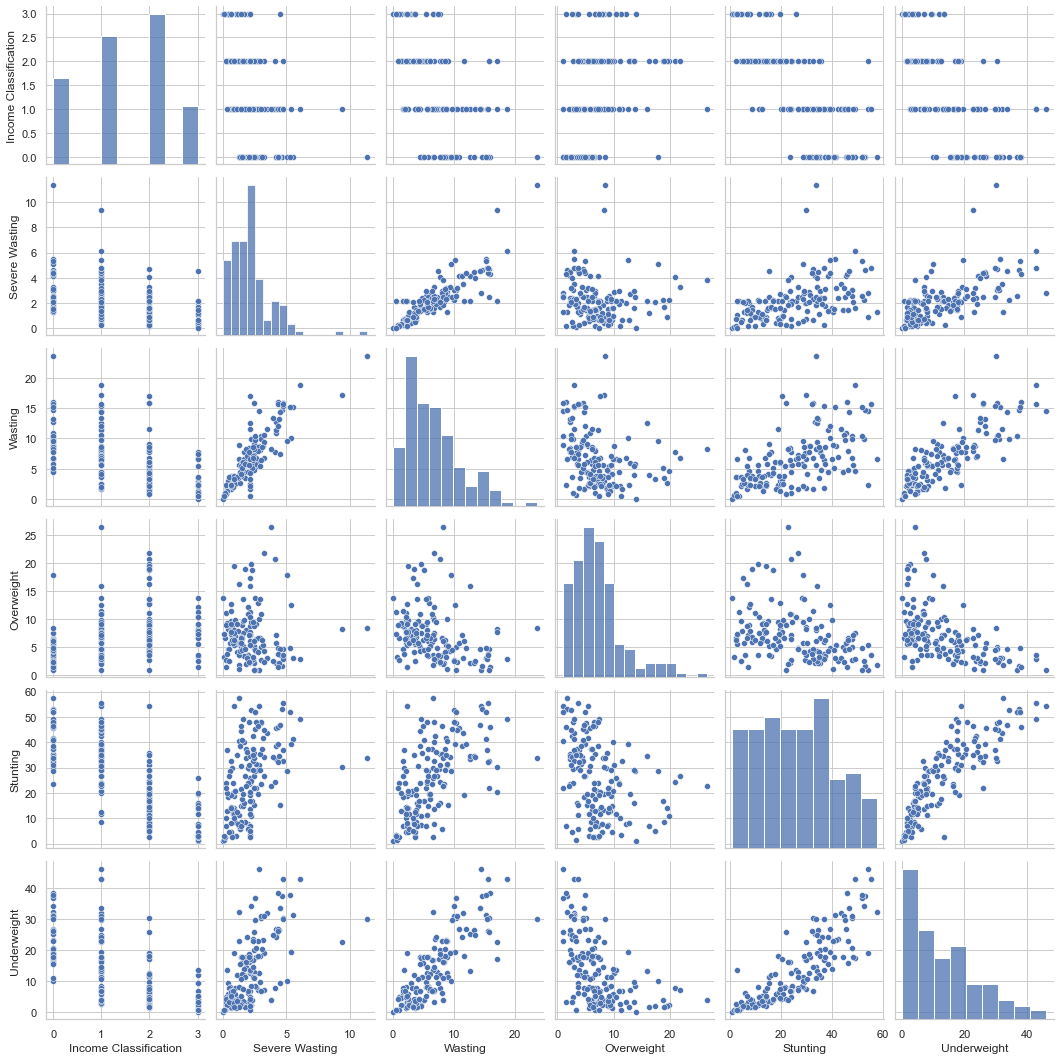

In [392]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
cols = ["Income Classification","Severe Wasting","Wasting","Overweight","Stunting","Underweight" ]
sns.pairplot(df_country[cols], height = 2.5 )
plt.show();

# Severe Wasting
Severe Wasting - % of children aged 0–59 months who are below minus three standard deviations from median weight-for-height. 

(array([0, 1, 2, 3]),
 [Text(0, 0, '0.0'), Text(1, 0, '1.0'), Text(2, 0, '2.0'), Text(3, 0, '3.0')])

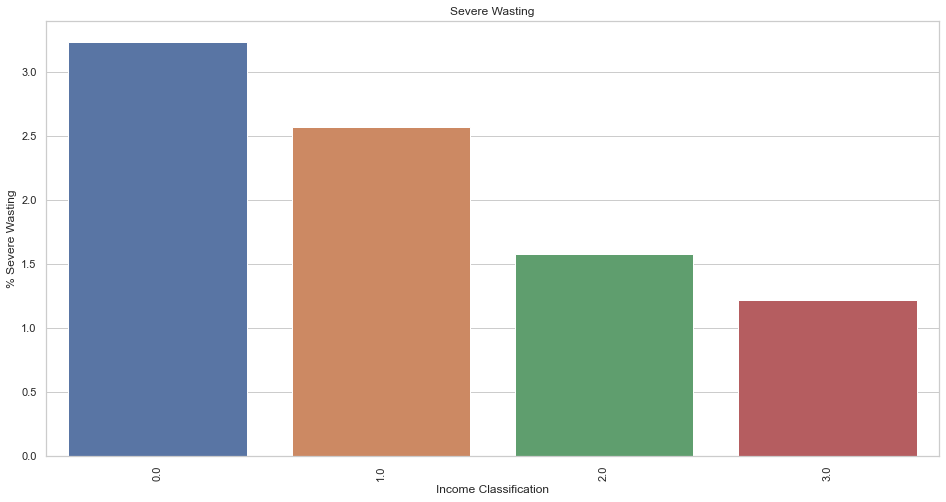

In [393]:
plt.figure(figsize=(16, 8))
x = df_country.groupby(["Income Classification"])["Severe Wasting"].mean()
sns.set(style="whitegrid")
ax = sns.barplot(x.index, x)
ax.set_title('Severe Wasting')
ax.set_ylabel('% Severe Wasting')
ax.set_xlabel('Income Classification')
plt.xticks(rotation = 90)

In [394]:
#Plotting on the WorldMap using plotly
x = df_country.groupby(["Country"])["Severe Wasting"].mean()
data = dict(type = 'choropleth',
            locations = x.index,
            locationmode = 'country names',
            colorscale= 'Portland',
            text= x.index,
            z=x,
            colorbar = {'title':'Severe Wasting %', 'len':200,'lenmode':'pixels' })
layout = dict(geo = {'scope':'world'},title="Severe Wasting % around the world")
col_map = go.Figure(data = [data],layout = layout)
col_map.show()

# Wasting
Wasting – Moderate and severe: % of children aged 0–59 months who are below minus two standard deviations from median weight-for-height


(array([0, 1, 2, 3]),
 [Text(0, 0, '0.0'), Text(1, 0, '1.0'), Text(2, 0, '2.0'), Text(3, 0, '3.0')])

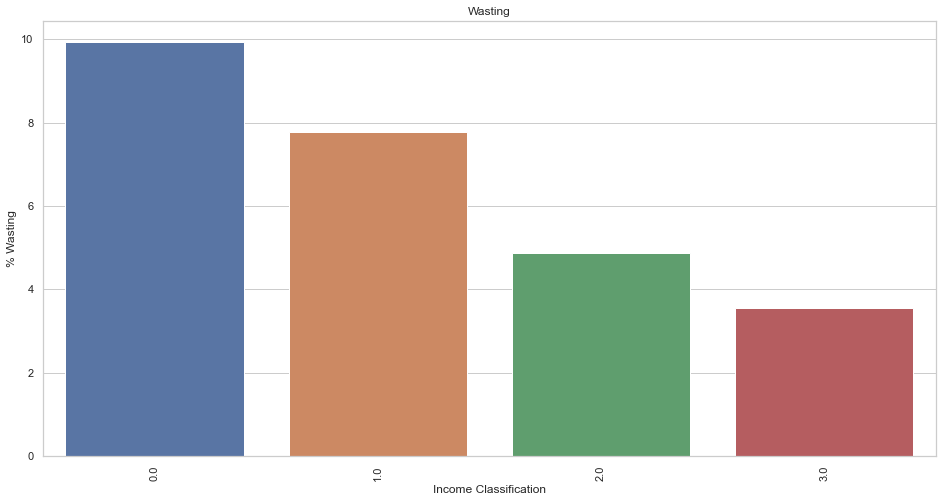

In [395]:
plt.figure(figsize=(16, 8))
x = df_country.groupby(["Income Classification"])["Wasting"].mean()
sns.set(style="whitegrid")
ax = sns.barplot(x.index, x)
ax.set_title('Wasting')
ax.set_ylabel('% Wasting')
ax.set_xlabel('Income Classification')
plt.xticks(rotation = 90)

In [396]:
#Plotting on the WorldMap using plotly
x = df_country.groupby(["Country"])["Wasting"].mean()
data = dict(type = 'choropleth',
            locations = x.index,
            locationmode = 'country names',
            colorscale= 'Portland',
            text= x.index,
            z=x,
            colorbar = {'title':'Wasting %', 'len':200,'lenmode':'pixels' })
layout = dict(geo = {'scope':'world'},title="Wasting % around the world")
col_map = go.Figure(data = [data],layout = layout)
col_map.show()

# Overweight
Overweight – Moderate and severe: % aged 0-59 months who are above two standard deviations from median weight-for-height


(array([0, 1, 2, 3]),
 [Text(0, 0, '0.0'), Text(1, 0, '1.0'), Text(2, 0, '2.0'), Text(3, 0, '3.0')])

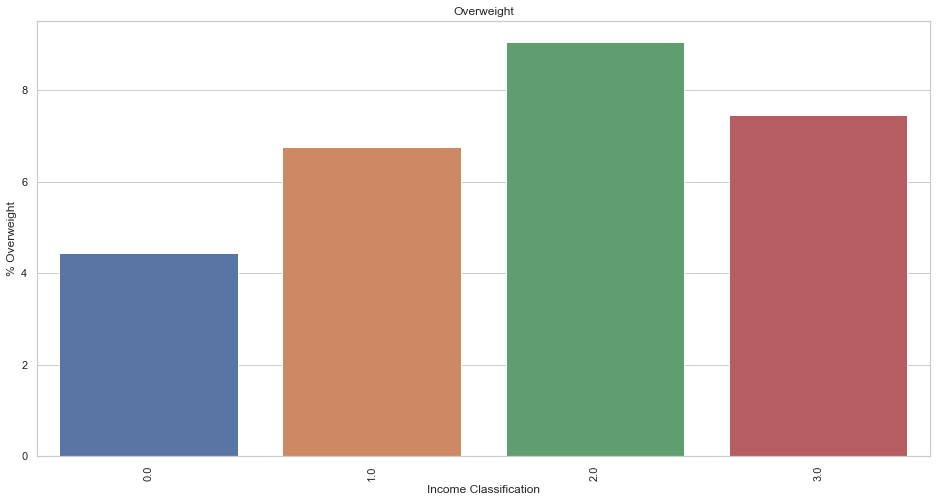

In [397]:
plt.figure(figsize=(16, 8))
x = df_country.groupby(["Income Classification"])["Overweight"].mean()
sns.set(style="whitegrid")
ax = sns.barplot(x.index, x)
ax.set_title('Overweight')
ax.set_ylabel('% Overweight')
ax.set_xlabel('Income Classification')
plt.xticks(rotation = 90)

In [398]:
#Plotting on the WorldMap using plotly
x = df_country.groupby(["Country"])["Overweight"].mean()
data = dict(type = 'choropleth',
            locations = x.index,
            locationmode = 'country names',
            colorscale= 'Portland',
            text= x.index,
            z=x,
            colorbar = {'title':'Overweight %', 'len':200,'lenmode':'pixels' })
layout = dict(geo = {'scope':'world'},title="Overweight % around the world")
col_map = go.Figure(data = [data],layout = layout)
col_map.show()

# Stunting
Stunting – Moderate and severe: % of children aged 0–59 months who are below minus two standard deviations from median height-for-age


(array([0, 1, 2, 3]),
 [Text(0, 0, '0.0'), Text(1, 0, '1.0'), Text(2, 0, '2.0'), Text(3, 0, '3.0')])

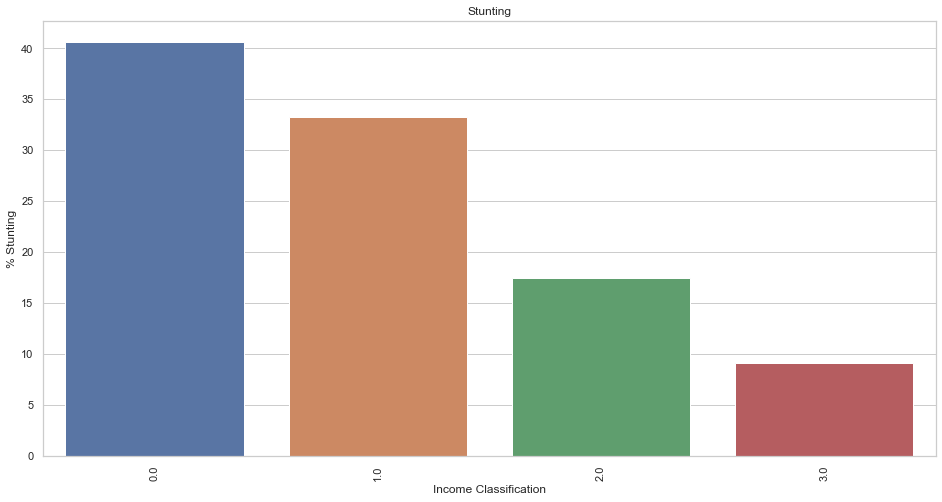

In [399]:
plt.figure(figsize=(16, 8))
x = df_country.groupby(["Income Classification"])["Stunting"].mean()
sns.set(style="whitegrid")
ax = sns.barplot(x.index, x)
ax.set_title('Stunting')
ax.set_ylabel('% Stunting')
ax.set_xlabel('Income Classification')
plt.xticks(rotation = 90)

In [400]:
x = df_country.groupby(["Country"])["Stunting"].mean()
data = dict(type = 'choropleth',
            locations = x.index,
            locationmode = 'country names',
            colorscale= 'Portland',
            text= x.index,
            z=x,
            colorbar = {'title':'stunting %', 'len':200,'lenmode':'pixels' })
layout = dict(geo = {'scope':'world'},title="stunting % around the world")
col_map = go.Figure(data = [data],layout = layout)
col_map.show()

# Underweight
Underweight – Moderate and severe: % of children aged 0–59 months who are below minus two standard deviations from median weight-for-age

(array([0, 1, 2, 3]),
 [Text(0, 0, '0.0'), Text(1, 0, '1.0'), Text(2, 0, '2.0'), Text(3, 0, '3.0')])

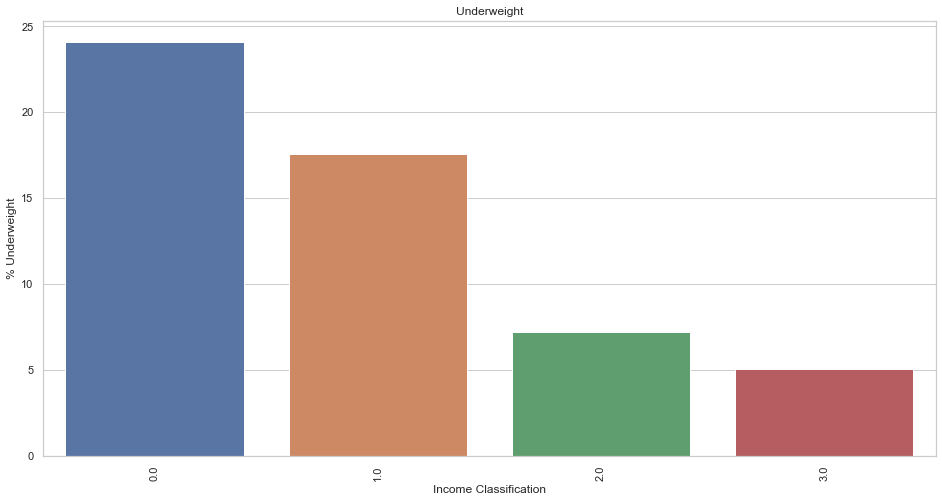

In [401]:
plt.figure(figsize=(16, 8))
x = df_country.groupby(["Income Classification"])["Underweight"].mean()
sns.set(style="whitegrid")
ax = sns.barplot(x.index, x)
ax.set_title('Underweight')
ax.set_ylabel('% Underweight')
ax.set_xlabel('Income Classification')
plt.xticks(rotation = 90)

In [402]:
x = df_country.groupby(["Country"])["Underweight"].mean()
data = dict(type = 'choropleth',
            locations = x.index,
            locationmode = 'country names',
            colorscale= 'Portland',
            text= x.index,
            z=x,
            colorbar = {'title':'Underweight %', 'len':200,'lenmode':'pixels' })
layout = dict(geo = {'scope':'world'},title="Underweight % around the world")
col_map = go.Figure(data = [data],layout = layout)
col_map.show()

<AxesSubplot:xlabel='Stunting', ylabel='Density'>

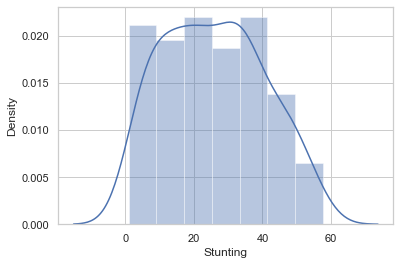

In [403]:
sns.distplot(df_country.Stunting)

In [404]:
df_country.Stunting=df_country.Stunting.fillna(df_country.Stunting.mean())

<AxesSubplot:xlabel='Severe Wasting', ylabel='Density'>

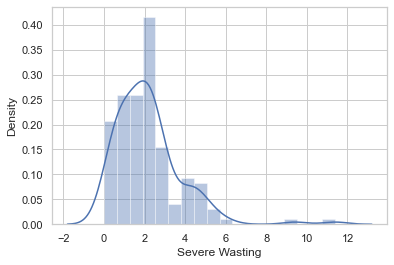

In [405]:
sns.distplot(df_country['Severe Wasting'])

In [406]:
df_country['Severe Wasting'].value_counts()

2.168650    12
1.400000     4
0.200000     3
0.333333     2
4.500000     2
            ..
4.075000     1
2.813636     1
0.650000     1
3.075000     1
0.000000     1
Name: Severe Wasting, Length: 126, dtype: int64

<AxesSubplot:xlabel='Severe Wasting'>

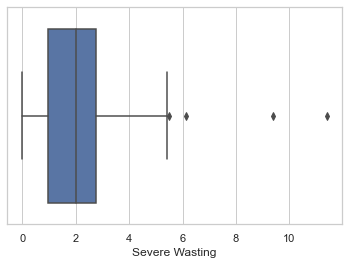

In [407]:
sns.boxplot(df_country['Severe Wasting'])

In [408]:
q1=df_country['Severe Wasting'].quantile(0.25)
q3=df_country['Severe Wasting'].quantile(0.75)
iqr=q3-q1
df_country=df_country[~((df_country['Severe Wasting']<(q1-iqr*1.5))|(df_country['Severe Wasting']>(q3+iqr*1.5)))]

<AxesSubplot:xlabel='Severe Wasting'>

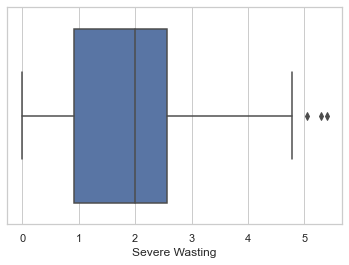

In [409]:
sns.boxplot(df_country['Severe Wasting'])

In [410]:
df_country['Severe Wasting']=df_country['Severe Wasting'].fillna(df_country['Severe Wasting'].mean())

In [411]:
df_country['Severe Wasting'].isnull().sum()

0

<AxesSubplot:xlabel='Wasting', ylabel='Density'>

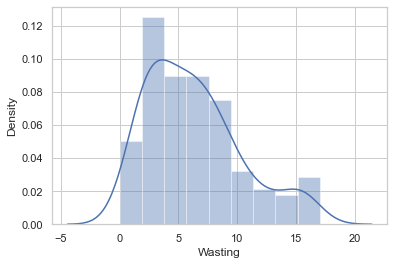

In [412]:

sns.distplot(df_country['Wasting'])

<AxesSubplot:xlabel='Wasting'>

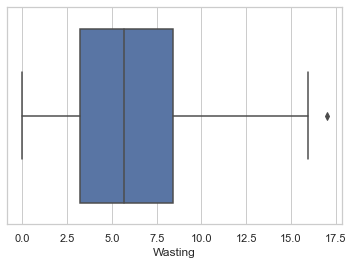

In [413]:
sns.boxplot(df_country['Wasting'])

In [414]:
q1=df_country['Wasting'].quantile(0.25)
q3=df_country['Wasting'].quantile(0.75)
iqr=q3-q1
df_country=df_country[~((df_country['Wasting']<(q1-iqr*1.5))|(df_country['Wasting']>(q3+iqr*1.5)))]

In [415]:
df_country['Wasting'].value_counts()

1.7000     3
3.5000     3
2.3000     3
6.8000     2
8.8000     2
          ..
7.7000     1
5.5500     1
2.1500     1
14.5375    1
0.0000     1
Name: Wasting, Length: 134, dtype: int64

In [416]:
df_country['Wasting']=df_country['Wasting'].fillna(df_country['Wasting'].mean())

<AxesSubplot:xlabel='Overweight', ylabel='Density'>

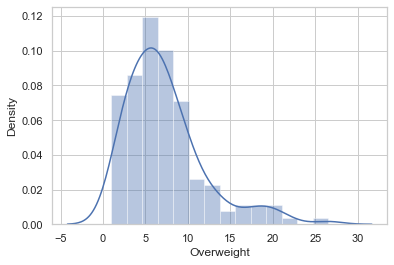

In [417]:
sns.distplot(df_country['Overweight'])

<AxesSubplot:xlabel='Overweight'>

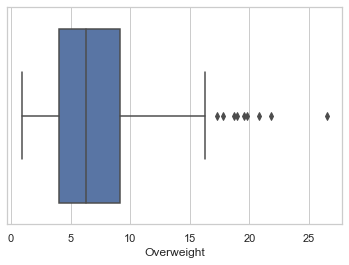

In [418]:
sns.boxplot(df_country['Overweight'])


In [419]:
q1=df_country['Overweight'].quantile(0.25)
q3=df_country['Overweight'].quantile(0.75)
iqr=q3-q1
df_country=df_country[~((df_country['Overweight']<(q1-iqr*1.5))|(df_country['Overweight']>(q3+iqr*1.5)))]

<AxesSubplot:xlabel='Overweight'>

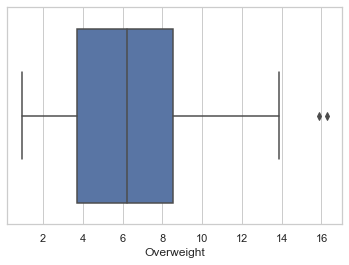

In [420]:
sns.boxplot(df_country['Overweight'])

In [421]:
df_country['Overweight']=df_country['Overweight'].fillna(df_country['Overweight'].mean())


<AxesSubplot:xlabel='Underweight', ylabel='Density'>

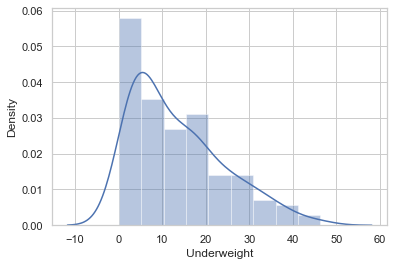

In [422]:
sns.distplot(df_country['Underweight'])

<AxesSubplot:xlabel='Underweight'>

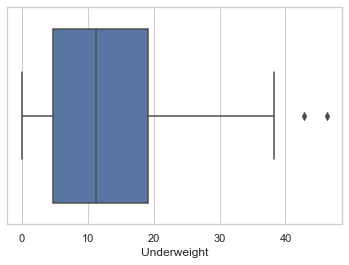

In [423]:
sns.boxplot(df_country['Underweight'])

In [424]:
q1=df_country['Underweight'].quantile(0.25)
q3=df_country['Underweight'].quantile(0.75)
iqr=q3-q1
df_country=df_country[~((df_country['Underweight']<(q1-iqr*1.5))|(df_country['Underweight']>(q3+iqr*1.5)))]

In [425]:
df_country['Underweight']=df_country['Underweight'].fillna(df_country['Underweight'].mean())

<AxesSubplot:xlabel='Income Classification', ylabel='count'>

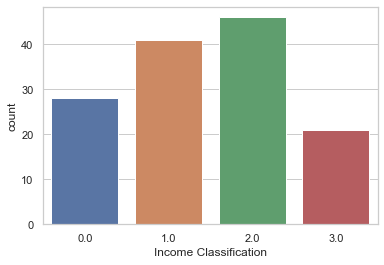

In [426]:
sns.countplot(df_country['Income Classification'])

<AxesSubplot:xlabel='Income Classification'>

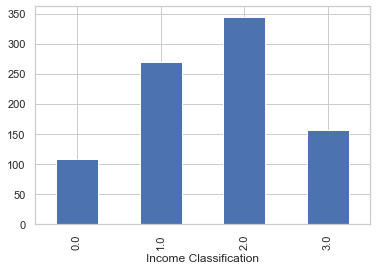

In [427]:
df_country.groupby(['Income Classification'])['Overweight'].sum().plot.bar()

In [428]:
income0_wise_country=df_country[df_country['Income Classification']==0.0]
income1_wise_country=df_country[df_country['Income Classification']==1.0]
income2_wise_country=df_country[df_country['Income Classification']==2.0]
income3_wise_country=df_country[df_country['Income Classification']==3.0]

In [429]:
df_country['Income Classification'].value_counts()

2.0    46
1.0    41
0.0    28
3.0    21
Name: Income Classification, dtype: int64

In [430]:
income0_wise_country['Country']

0                                  AFGHANISTAN
13                                       BENIN
21                                BURKINA FASO
22                                     BURUNDI
27              CENTRAL AFRICAN REPUBLIC (THE)
38     DEMOCRATIC PEOPLE'S REP. OF KOREA (THE)
39          DEMOCRATIC REP. OF THE CONGO (THE)
46                                     ERITREA
48                                    ETHIOPIA
51                                GAMBIA (THE)
56                                      GUINEA
57                               GUINEA-BISSAU
59                                       HAITI
76                                     LIBERIA
78                                  MADAGASCAR
79                                      MALAWI
82                                        MALI
90                                  MOZAMBIQUE
94                                       NEPAL
96                                 NIGER (THE)
111                                     RWANDA
119          

<AxesSubplot:xlabel='Country'>

<Figure size 1152x648 with 0 Axes>

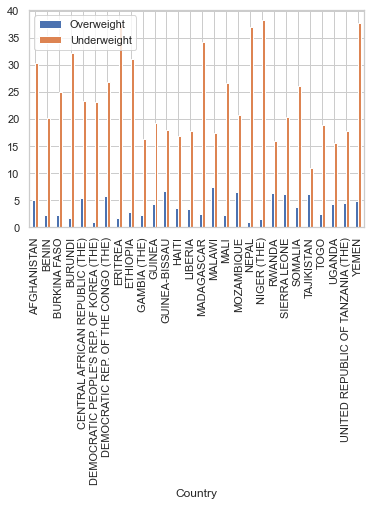

In [431]:
plt.figure(figsize=(16,9))
income0_wise_country.groupby(['Country'])['Overweight','Underweight'].mean().plot.bar()

<AxesSubplot:xlabel='Country'>

<Figure size 720x720 with 0 Axes>

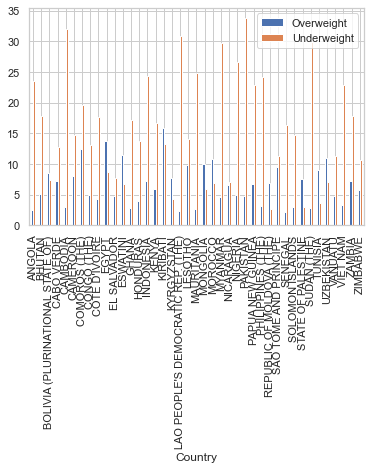

In [432]:
plt.figure(figsize=(10,10))
income1_wise_country.groupby(['Country'])['Overweight','Underweight'].mean().plot.bar()

<Figure size 864x576 with 0 Axes>

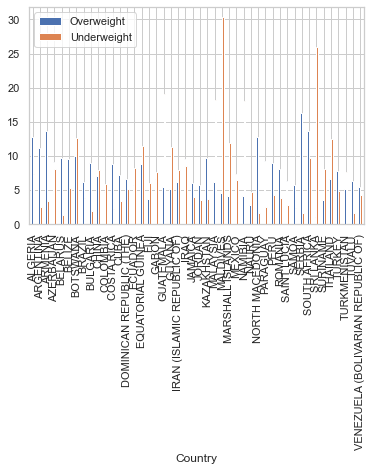

In [433]:
plt.figure(figsize=(12,8))
income2_wise_country.groupby(['Country'])['Overweight','Underweight'].mean().plot.bar()
plt.show()

<Figure size 864x576 with 0 Axes>

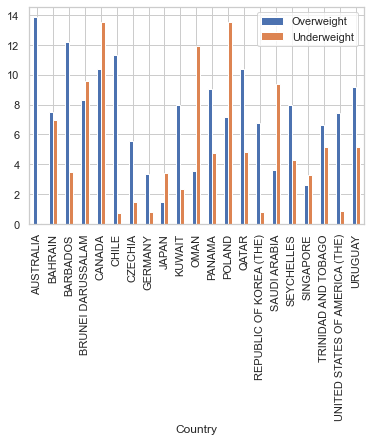

In [434]:
plt.figure(figsize=(12,8))
income3_wise_country.groupby(['Country'])['Overweight','Underweight'].mean().plot.bar()
plt.show()

<AxesSubplot:xlabel='Country'>

<Figure size 1152x648 with 0 Axes>

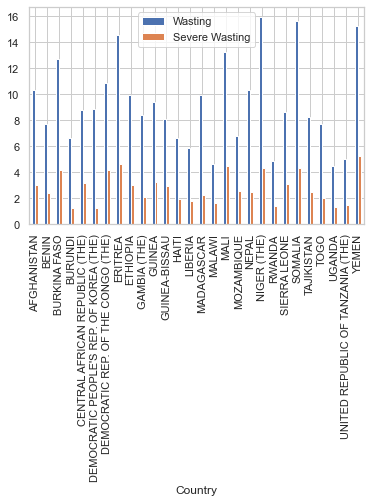

In [435]:
plt.figure(figsize=(16,9))
income0_wise_country.groupby(['Country'])['Wasting','Severe Wasting'].mean().plot.bar()

In [436]:
income0_wise_country.groupby(['Country'])['Underweight'].max().sort_values(ascending=False).head(1)

Country
NIGER (THE)    38.263636
Name: Underweight, dtype: float64

In [437]:
income1_wise_country.groupby(['Country'])['Underweight'].max().sort_values(ascending=False).head(1)

Country
PAKISTAN    33.7375
Name: Underweight, dtype: float64

In [438]:
income2_wise_country.groupby(['Country'])['Underweight'].max().sort_values(ascending=False).head(1)

Country
MALDIVES    30.32
Name: Underweight, dtype: float64

In [439]:
income3_wise_country.groupby(['Country'])['Underweight'].max().sort_values(ascending=False).head(1)

Country
POLAND    13.503047
Name: Underweight, dtype: float64

In [440]:
income0_wise_country.groupby(['Country'])['Overweight'].max().sort_values(ascending=False).head(1)

Country
MALAWI    7.484615
Name: Overweight, dtype: float64

In [441]:

income1_wise_country.groupby(['Country'])['Overweight'].max().sort_values(ascending=False).head(1)

Country
KIRIBATI    15.9
Name: Overweight, dtype: float64

In [442]:
income2_wise_country.groupby(['Country'])['Overweight'].max().sort_values(ascending=False).head(1)

Country
SERBIA    16.266667
Name: Overweight, dtype: float64

In [443]:
income3_wise_country.groupby(['Country'])['Overweight'].max().sort_values(ascending=False).head(1)

Country
AUSTRALIA    13.875
Name: Overweight, dtype: float64

In [444]:
income0_wise_country.groupby(['Country'])['Stunting'].max().sort_values(ascending=False).head(1)

Country
BURUNDI    57.6
Name: Stunting, dtype: float64

In [445]:
income1_wise_country.groupby(['Country'])['Stunting'].max().sort_values(ascending=False).head(1)

Country
ZAMBIA    48.1375
Name: Stunting, dtype: float64

In [446]:
income2_wise_country.groupby(['Country'])['Stunting'].max().sort_values(ascending=False).head(1)

Country
GUATEMALA    54.1
Name: Stunting, dtype: float64

In [447]:
income3_wise_country.groupby(['Country'])['Stunting'].max().sort_values(ascending=False).head(1)

Country
CANADA    25.814728
Name: Stunting, dtype: float64

In [448]:
income0_wise_country.groupby(['Country'])['Wasting'].max().sort_values(ascending=False).head(1)

Country
NIGER (THE)    15.936364
Name: Wasting, dtype: float64

In [449]:
income1_wise_country.groupby(['Country'])['Wasting'].max().sort_values(ascending=False).head(1)

Country
SUDAN (THE)    15.4
Name: Wasting, dtype: float64

In [450]:
income2_wise_country.groupby(['Country'])['Wasting'].max().sort_values(ascending=False).head(1)

Country
MALDIVES    15.78
Name: Wasting, dtype: float64

In [451]:
income3_wise_country.groupby(['Country'])['Wasting'].max().sort_values(ascending=False).head(1)

Country
OMAN    7.783333
Name: Wasting, dtype: float64